In [86]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
from prettytable import PrettyTable

In [87]:
#load saved data
dbfile = open('data_Adaboost', 'rb')
Ada_data = pickle.load(dbfile)
dbfile.close()


#retrieve accuracies from saved data
num_estimators=[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
dataset_keys=['base','basic_name','doc2vec']
labels=[]
accuracies=[]
for i in range(len(dataset_keys)):        
    for j in range(3):
        labels.append(dataset_keys[i]+', depth:'+str(j+1))
        accs=[]
        for k in range(11):
            accs.append(Ada_data[i][j][k][0]['acc'])
        accuracies.append(accs)

# Plotting

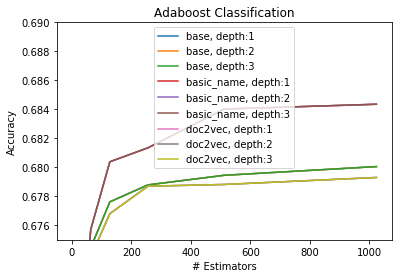

In [81]:
        
fig=plt.figure()
for i in range(len(accuracies)):
    plt.plot(num_estimators,accuracies[i],label=labels[i])
plt.legend()
plt.title('Adaboost Classification')
plt.ylabel('Accuracy')
plt.xlabel('# Estimators')
plt.ylim(.675,.69)
plt.savefig('./curry_figs/ada1.png')
plt.show()

9


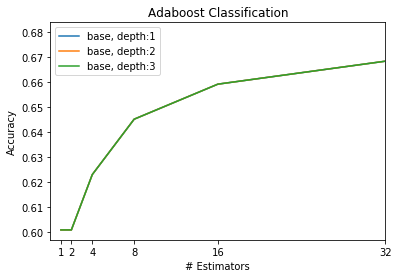

In [88]:
fig=plt.figure()
print(len(accuracies))
for i in range(len(accuracies[:3])):
    plt.plot(num_estimators,accuracies[i],label=labels[i])
plt.legend()
plt.title('Adaboost Classification')
plt.ylabel('Accuracy')
plt.xlabel('# Estimators')
#plt.ylim(.675,.69)
plt.xlim(0,32)
plt.xticks([1,2,4,8,16,32])
plt.savefig('./curry_figs/ada2.png')
plt.show()

9


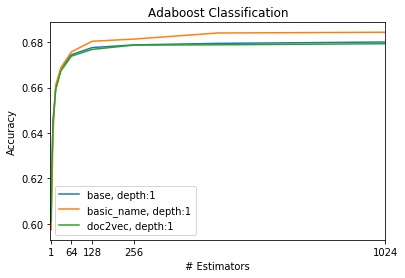

In [63]:
fig=plt.figure()
print(len(accuracies))
for i in range(0,len(accuracies),3):
    plt.plot(num_estimators,accuracies[i],label=labels[i])
plt.legend()
plt.title('Adaboost Classification')
plt.ylabel('Accuracy')
plt.xlabel('# Estimators')
plt.xlim(0,256,512,1024)
plt.xticks([1,64,128,256,512,1024])
plt.savefig('./curry_figs/ada5.png')
plt.show()

9


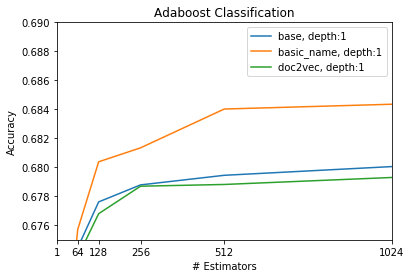

In [89]:
fig=plt.figure()
print(len(accuracies))
for i in range(0,len(accuracies),3):
    plt.plot(num_estimators,accuracies[i],label=labels[i])
plt.legend()
plt.title('Adaboost Classification')
plt.ylabel('Accuracy')
plt.xlabel('# Estimators')
plt.ylim(.675,.69)
plt.xlim(0,256,512,1024)
plt.xticks([1,64,128,256,512,1024])
plt.savefig('./curry_figs/ada6.png')
plt.show()

# Load data, more plotting

In [90]:
dbfile = open('data_RFC', 'rb')
RFC_data = pickle.load(dbfile)
dbfile.close()

accuracies=[]
for i in range(len(dataset_keys)):
    accs=[]
    for j in range(len(num_estimators)):
        accs.append(RFC_data[i][j][0]['acc'])
    accuracies.append(accs)


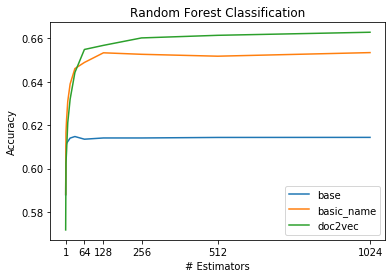

In [92]:
fig=plt.figure()
for i in range(len(accuracies)):
    plt.plot(num_estimators,accuracies[i],label=dataset_keys[i])
plt.legend()
plt.title('Random Forest Classification')
plt.ylabel('Accuracy')
plt.xlabel('# Estimators')
plt.xticks([1,64,128,256,512,1024])
plt.savefig('./curry_figs/rfc1.png')
plt.show()

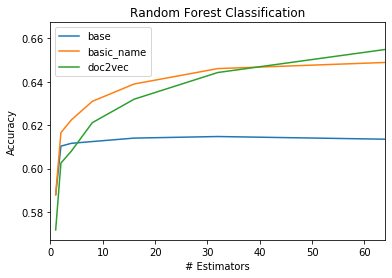

In [34]:
fig=plt.figure()
for i in range(len(accuracies)):
    plt.plot(num_estimators,accuracies[i],label=dataset_keys[i])
plt.legend()
plt.title('Random Forest Classification')
plt.ylabel('Accuracy')
plt.xlabel('# Estimators')
plt.xlim(0,64)
plt.savefig('./curry_figs/rfc2.png')
plt.show()

# load predictions from all models, stardize data types, and build similarity matrix

In [75]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from prettytable import PrettyTable

labels=[]
preds=[]
dbfile = open('./knn-predictions/base-test-predictions-1575836051.143159.pickle', 'rb')
preds.append(pickle.load(dbfile))
labels.append('knn_base')
dbfile.close()
dbfile = open('./knn-predictions/basic-test-predictions-1575835928.691891.pickle', 'rb')
preds.append(pickle.load(dbfile))
labels.append('knn_basic')
dbfile.close()
dbfile = open('./knn-predictions/d2v-test-predictions-1575836012.216281.pickle', 'rb')
preds.append(pickle.load(dbfile))
labels.append('knn_d2v')
dbfile.close()

dbfile = open('./nn-final-models/base-test-predictions-1575835107.478405.pickle', 'rb')
preds.append(pickle.load(dbfile))
labels.append('nn_base')
dbfile.close()
dbfile = open('./nn-final-models/basicname-test-predictions-1575835107.478405.pickle', 'rb')
preds.append(pickle.load(dbfile))
labels.append('nn_basic')
dbfile.close()
dbfile = open('./nn-final-models/doc2vec-test-predictions-1575835107.478405.pickle', 'rb')
preds.append(pickle.load(dbfile))
labels.append('nn_d2v')
dbfile.close()

dbfile = open('./svm-predictions/base-test-predictions-1575838424.324989.pickle', 'rb')
preds.append(pickle.load(dbfile))
labels.append('svm_base')
dbfile.close()
dbfile = open('./svm-predictions/basic-test-predictions-1575835932.142707.pickle', 'rb')
preds.append(pickle.load(dbfile))
labels.append('svm_basic')
dbfile.close()

dbfile = open('./Figures/LogReg/BaseDataset/yhat_TEST_Base.pickle', 'rb')
preds.append(pickle.load(dbfile))
labels.append('LogReg_base')
dbfile.close()
dbfile = open('./Figures/LogReg/BasicNamesDataSet/yhat_TEST_BasicName.pickle', 'rb')
preds.append(pickle.load(dbfile))
labels.append('LogReg_basic')
dbfile.close()
dbfile = open('./Figures/LogReg/Doc2VecDataSet/yhat_TEST_Doc2Vec.pickle', 'rb')
preds.append(pickle.load(dbfile))
labels.append('LogReg_d2v')
dbfile.close()

dbfile = open('./Curry_Figs/Ada_Pred0', 'rb')
preds.append(pickle.load(dbfile))
labels.append('Ada_base')
dbfile.close()
dbfile = open('./Curry_Figs/Ada_Pred1', 'rb')
preds.append(pickle.load(dbfile))
labels.append('Ada_basic')
dbfile.close()
dbfile = open('./Curry_Figs/Ada_Pred2', 'rb')
preds.append(pickle.load(dbfile))
labels.append('Ada_d2v')
dbfile.close()

dbfile = open('./Curry_Figs/rfc_pred0', 'rb')
preds.append(pickle.load(dbfile))
labels.append('RFC_base')
dbfile.close()
dbfile = open('./Curry_Figs/rfc_pred1', 'rb')
preds.append(pickle.load(dbfile))
labels.append('RFC_basic')
dbfile.close()
dbfile = open('./Curry_Figs/rfc_pred2', 'rb')
preds.append(pickle.load(dbfile))
labels.append('RFC_d2v')
dbfile.close()

y_test=np.array(pd.read_csv("./data/preprocess-base-y-test.csv")['success'])

In [76]:
for i in range(len(preds)):
    preds[i]=preds[i].flatten()
    
for i in range(len(preds)):
    preds[i]=preds[i].tolist()
    
for i in range(len(preds)):
    if type(preds[i][0])!=type(True):
        for j in range(len(preds[0])):
            preds[i][j]=True if preds[i][j] >= .5 else False
preds=np.asarray(preds)

# for i in range(len(preds)):
#     print(type(preds[i][0]))
# preds=np.asarray(preds)
#print(preds)
# for i in range(len(preds)):
#     print(type(preds[i]),type(preds[i][0]))
#     if preds[i][0]=True or preds[i][0]==False:
#         for j in range(len(preds[i])):
#             preds[i][j]=1 if preds[i][j]==True else 0
#     if preds[i].shape==(50007, 1):
#         preds[i]=preds[i].flatten()
#         for j in range(len(preds[i])):
#             preds[i][j]=True if preds[i][j] >= .50 else False


In [32]:

def comparePredictions(predictions,modelNames):
    l={}
    n_pred=len(predictions[0])
    tbl=np.zeros((len(predictions)+1,len(predictions)+1)).tolist()
    tbl[0][0]=''
    for i,n1 in zip(range(len(predictions)),modelNames):
        tbl[0][i+1]=n1
        tbl[i+1][0]=n1
        for j,n2 in zip(range(len(predictions)),modelNames):
            
            c=0
            for k in range(n_pred):
                if predictions[i][k]==predictions[j][k]:
                    c+=1
            
            tbl[i+1][j+1]=round(c/n_pred*100,0)
            l[n1+' '+n2]=round(c/n_pred*100,0)
#     print(tbl)
    return tbl

In [27]:
for i in labels:
    print(i)

knn_base
knn_basic
knn_d2v
nn_base
nn_basic
nn_d2v
svm_base
svm_basic
LogReg_base
LogReg_basic
LogReg_d2v
Ada_base
Ada_basic
Ada_d2v
RFC_base
RFC_basic
RFC_d2v


In [33]:
tbl=comparePredictions(preds,labels)


In [37]:
for i in range(1,len(tbl)):
    print('%12s| %3.f & %3.f & %3.f & %3.f & %3.f & %3.f & %3.f & %3.f & %3.f & %3.f & %3.f & %3.f & %3.f & %3.f & %3.f & %3.f & %3.f &' % (tbl[i][0],tbl[i][1],tbl[i][2],tbl[i][3],tbl[i][4],tbl[i][5],tbl[i][6],tbl[i][7],tbl[i][8],tbl[i][9],tbl[i][10],tbl[i][11],tbl[i][12],tbl[i][13],tbl[i][14],tbl[i][15],tbl[i][16],tbl[i][17]))

    knn_base| 100 &  85 &  88 &  83 &  82 &  82 &  84 &  77 &  83 &  78 &  82 &  80 &  79 &  79 &  78 &  78 &  81 &
   knn_basic|  85 & 100 &  93 &  88 &  89 &  86 &  90 &  83 &  88 &  82 &  88 &  82 &  81 &  81 &  73 &  79 &  85 &
     knn_d2v|  88 &  93 & 100 &  88 &  90 &  87 &  91 &  82 &  89 &  81 &  88 &  83 &  81 &  82 &  74 &  79 &  86 &
     nn_base|  83 &  88 &  88 & 100 &  86 &  89 &  88 &  80 &  92 &  86 &  90 &  86 &  85 &  85 &  74 &  81 &  87 &
    nn_basic|  82 &  89 &  90 &  86 & 100 &  87 &  90 &  83 &  89 &  77 &  89 &  82 &  81 &  82 &  72 &  79 &  87 &
      nn_d2v|  82 &  86 &  87 &  89 &  87 & 100 &  86 &  79 &  89 &  83 &  90 &  86 &  84 &  86 &  74 &  80 &  88 &
    svm_base|  84 &  90 &  91 &  88 &  90 &  86 & 100 &  84 &  89 &  81 &  89 &  81 &  80 &  81 &  73 &  78 &  85 &
   svm_basic|  77 &  83 &  82 &  80 &  83 &  79 &  84 & 100 &  81 &  77 &  80 &  76 &  76 &  76 &  69 &  77 &  79 &
 LogReg_base|  83 &  88 &  89 &  92 &  89 &  89 &  89 &  81 & 100 &  87 

In [91]:
x = PrettyTable()

for i in tbl:
    print('|%s|')

x.field_names = tbl[0]

for i in range(1,len(tbl)):
    x.add_row(tbl[i])

print(x)

+--------------+----------+-----------+---------+---------+----------+--------+----------+-----------+-------------+--------------+------------+
|     0.0      | knn_base | knn_basic | knn_d2v | nn_base | nn_basic | nn_d2v | svm_base | svm_basic | LogReg_base | LogReg_basic | LogReg_d2v |
+--------------+----------+-----------+---------+---------+----------+--------+----------+-----------+-------------+--------------+------------+
|   knn_base   |   1.0    |    0.85   |  0.875  |  0.001  |   0.0    | 0.001  |  0.838   |   0.773   |    0.829    |    0.777     |   0.823    |
|  knn_basic   |   0.85   |    1.0    |  0.935  |  0.001  |   0.0    | 0.001  |  0.902   |    0.83   |    0.884    |    0.819     |   0.876    |
|   knn_d2v    |  0.875   |   0.935   |   1.0   |  0.001  |   0.0    | 0.001  |  0.915   |   0.821   |    0.891    |    0.806     |   0.882    |
|   nn_base    |  0.001   |   0.001   |  0.001  |   1.0   |   0.0    | 0.001  |  0.001   |   0.001   |    0.001    |    0.001     